In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


<Axes: >

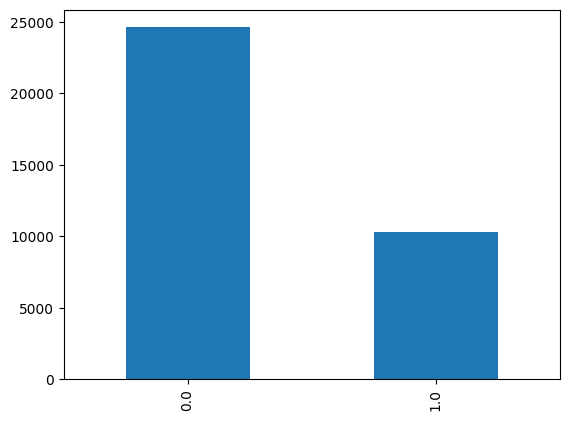

In [5]:
train[train['Exited'] == 1]['IsActiveMember'].value_counts().plot(kind='bar')

<Axes: ylabel='Gender'>

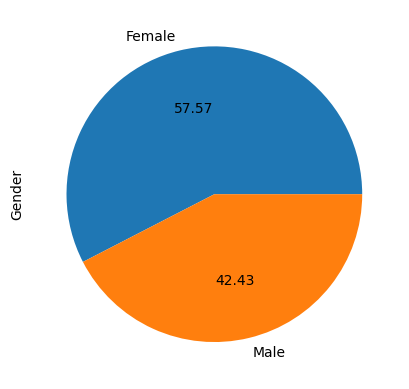

In [6]:
train[train['Exited'] == 1]['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Geography'>

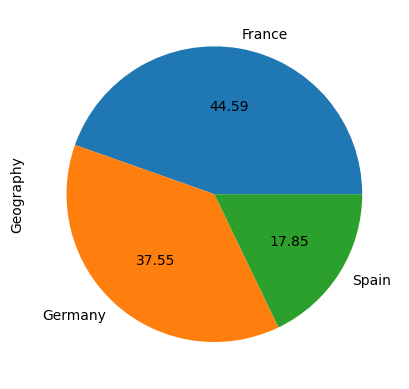

In [7]:
train[train['Exited'] == 1]['Geography'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Frequency'>

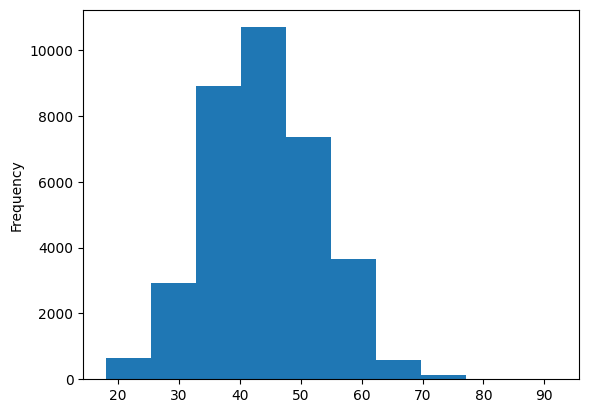

In [8]:
train[train['Exited'] == 1]['Age'].plot(kind='hist')

<Axes: ylabel='Age'>

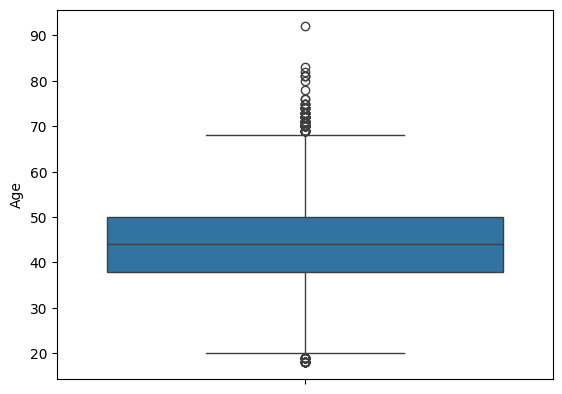

In [9]:
sns.boxplot(train[train['Exited'] == 1]['Age'])

<Axes: ylabel='Exited'>

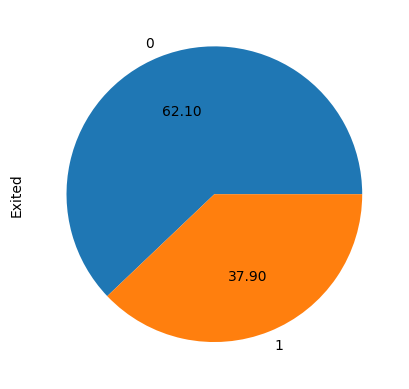

In [10]:
train[train['Geography'] == 'Germany']['Exited'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Frequency'>

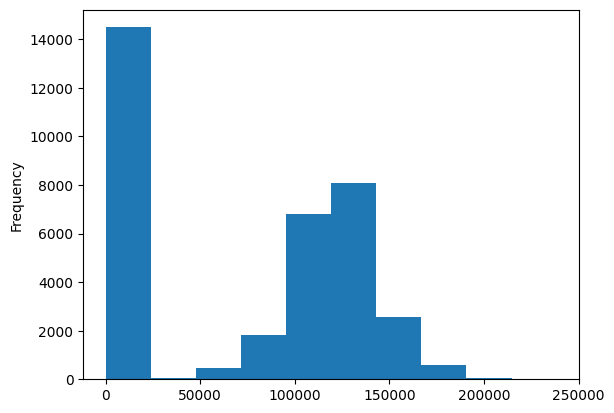

In [11]:
train[train['Exited'] == 1]['Balance'].plot(kind='hist')

<Axes: ylabel='Frequency'>

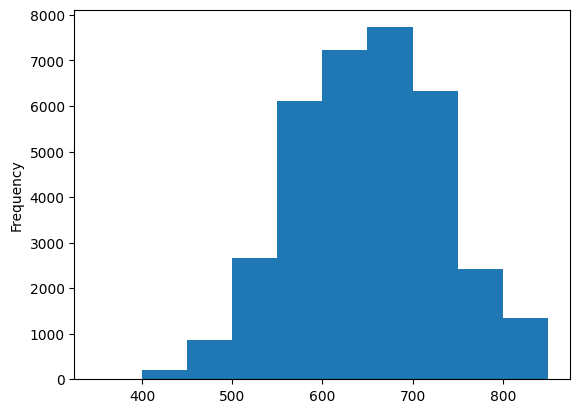

In [12]:
train[train['Exited'] == 1]['CreditScore'].plot(kind='hist')

<Axes: ylabel='HasCrCard'>

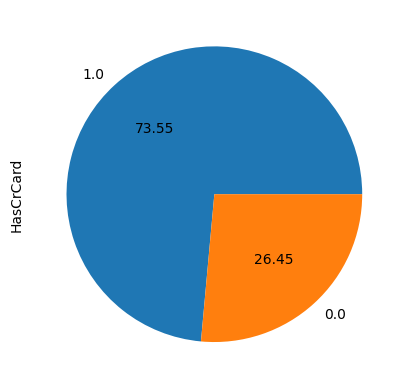

In [13]:
train[train['Exited'] == 1]['HasCrCard'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='NumOfProducts'>

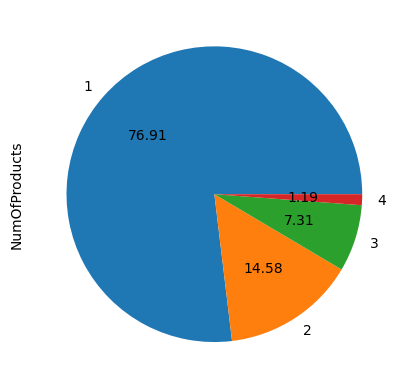

In [14]:
train[train['Exited']==1]['NumOfProducts'].value_counts().plot(kind='pie',autopct='%.2f')

In [15]:
id = test['id']

In [16]:
train.drop(['EstimatedSalary','id','CustomerId','Surname','Tenure'],axis=1,inplace=True)
test.drop(['EstimatedSalary','id','CustomerId','Surname','Tenure'],axis=1,inplace=True)

In [17]:
train.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,668,France,Male,33.0,0.00,2,1.0,0.0,0
1,627,France,Male,33.0,0.00,2,1.0,1.0,0
2,678,France,Male,40.0,0.00,2,1.0,0.0,0
3,581,France,Male,34.0,148882.54,1,1.0,1.0,0
4,716,Spain,Male,33.0,0.00,2,1.0,1.0,0


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline

In [24]:
y = train['Exited']
X = train.drop(['Exited'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=15)

In [27]:
X_train

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember
147246,653,Germany,Male,45.0,133467.77,1,1.0,0.0
78898,586,Spain,Male,36.0,0.00,2,0.0,0.0
81320,657,Germany,Female,38.0,123760.68,1,1.0,1.0
148485,700,France,Male,26.0,0.00,2,0.0,0.0
31881,590,France,Male,35.0,112079.58,2,0.0,0.0
...,...,...,...,...,...,...,...,...
35483,724,France,Male,31.0,106447.67,1,0.0,1.0
116892,700,France,Male,57.0,171922.91,1,1.0,1.0
104832,754,Germany,Female,50.0,103522.75,2,1.0,1.0
8076,537,France,Female,35.0,157842.07,3,1.0,0.0


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [87]:
trf1 = ColumnTransformer([('ohe',OneHotEncoder(sparse=False,drop='first'),[1,2])],remainder='passthrough')

In [88]:
trf2 = ColumnTransformer([('scaler',StandardScaler(),[0,1,2])],remainder='passthrough')

In [89]:
trf3 = DecisionTreeClassifier()

In [90]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [58]:
X_train.dropna(inplace=True)

In [59]:
y_train.dropna(inplace=True)

In [91]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [1, 2])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [0, 1, 2])])),
                ('trf3', DecisionTreeClassifier())])

In [94]:
y_predict = pipe.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.8053443209016269

In [96]:
XF = test.iloc[:,:]

In [97]:
y_final = pipe.predict(XF)

In [98]:
final = pd.DataFrame()

In [99]:
final['id'] = id
final['Exited'] = y_final

In [100]:
final.head()

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,1
4,165038,0


In [101]:
final.to_csv('final.csv',index=False)